In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
bicon = pd.read_csv('datasets/bioCON_plant_diversity.txt', delimiter='\t')

# Data sampling and collection

# Data cleaning

In [24]:
bicon

,Year,Plot,Ring,CO2 Treatment,Nitrogen Treatment,CountOfSpecies,CountOfGroup,Experiment,monospecies,Monogroup,Water Treatment,Temp Treatment,Depth,Carbon(%),Nitrogen(%),C/N Ratio
0,2002,1,1,Cenrich,Namb,4,2,M,,,,,0-10,0.618,0.074,8.351351
1,2002,1,1,Cenrich,Namb,4,2,M,,,,,10-20,0.515,0.057,9.035088
2,2002,1,1,Cenrich,Namb,4,2,M,,,,,20-40,0.142,0.023,6.173913
3,2002,1,1,Cenrich,Namb,4,2,M,,,,,40-60,0.132,0.016,8.250000
4,2002,2,1,Cenrich,Namb,1,1,M,Bouteloua gracilis,C-4,,,0-10,0.550,0.070,7.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5628,2016,365,6,Camb,Nenrich,4,2,M,,,,,40-60,0.329,0.027,12.185185
5629,2016,366,6,Camb,Nenrich,1,1,M,Achillea millefolium,Forb,,,0-10,0.850,0.066,12.878788
5630,2016,366,6,Camb,Nenrich,1,1,M,Achillea millefolium,Forb,,,10-20,0.570,0.050,11.400000
5631,2016,366,6,Camb,Nenrich,1,1,M,Achillea millefolium,Forb,,,20-40,0.454,0.036,12.611111


In [51]:
bicon['Carbon(%)'].replace('', np.nan, inplace=True)
bicon['Nitrogen(%)'].replace('', np.nan, inplace=True)
bicon['C/N Ratio'].replace(' ', np.nan, inplace=True)
bicon.dropna(subset=['Carbon(%)', 'Nitrogen(%)', 'C/N Ratio'], inplace=True)
bicon['Carbon(%)'] = bicon['Carbon(%)'].astype(float)
bicon['Nitrogen(%)'] = bicon['Nitrogen(%)'].astype(float)
bicon['C/N Ratio'] = bicon['C/N Ratio'].astype(float)

# Exploratory data analysis

<AxesSubplot: xlabel='CountOfSpecies'>

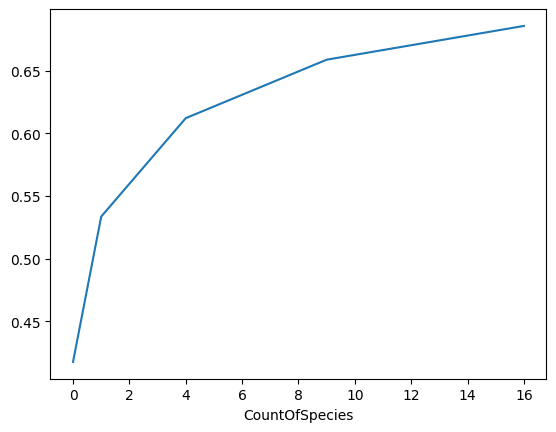

In [46]:
bicon.groupby(['CountOfSpecies'])['Carbon(%)'].mean().plot()

<AxesSubplot: xlabel='CountOfSpecies'>

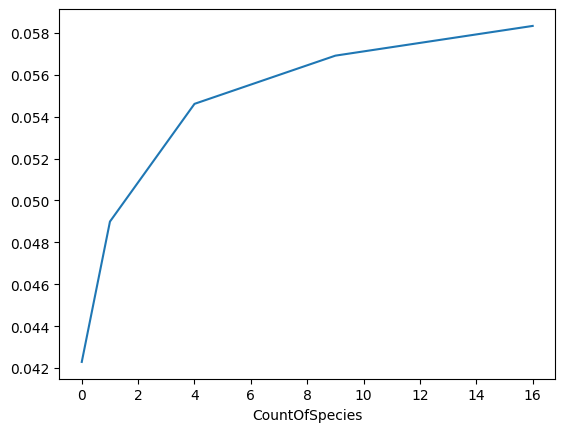

In [50]:
bicon.groupby(['CountOfSpecies'])['Nitrogen(%)'].mean().plot()

In [45]:
bicon[(bicon['Temp Treatment'] == 'HTelv') | (bicon['Temp Treatment'] == 'HTamb')]['Carbon(%)'].mean()

0.6662741514360313

In [53]:
bicon.groupby('Year').mean()

/var/folders/rp/0n508lmj72ldc75gvssc3p200000gn/T/ipykernel_96598/3005142552.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bicon.groupby('Year').mean()


,Plot,CountOfSpecies,CountOfGroup,Carbon(%),Nitrogen(%),C/N Ratio
Year,,,,,,
2002,186.111336,5.192308,2.269231,0.555184,0.056675,9.873872
2007,186.000000,5.196765,2.269542,0.644554,0.056111,11.191059
2012,185.896831,5.199595,2.270398,0.619814,0.054675,11.216634
2016,183.597956,5.695060,2.469336,0.559779,0.043070,13.676147


<AxesSubplot: xlabel='Nitrogen Treatment', ylabel='Nitrogen(%)'>

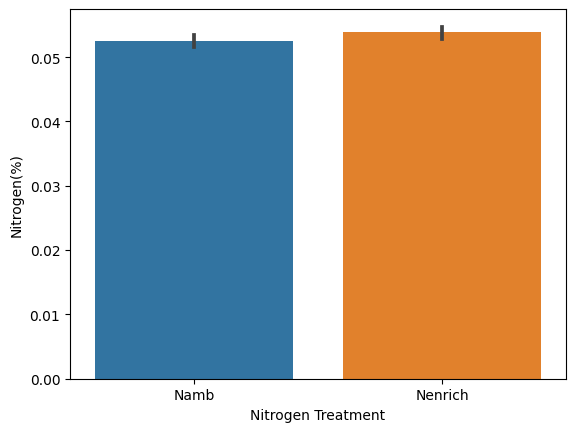

In [66]:
#sns.lmplot(x = "Nitrogen(%)", y = "Carbon(%)", data = bicon, hue = "Nitrogen Treatment", scatter_kws={"s": 1})
sns.barplot(data = bicon, x="Nitrogen Treatment", y='Nitrogen(%)' )

<AxesSubplot: xlabel='CO2 Treatment', ylabel='Carbon(%)'>

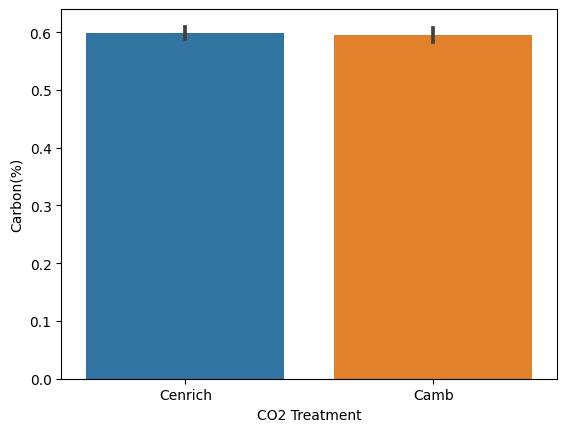

In [65]:
sns.barplot(data = bicon, x="CO2 Treatment", y='Carbon(%)' )

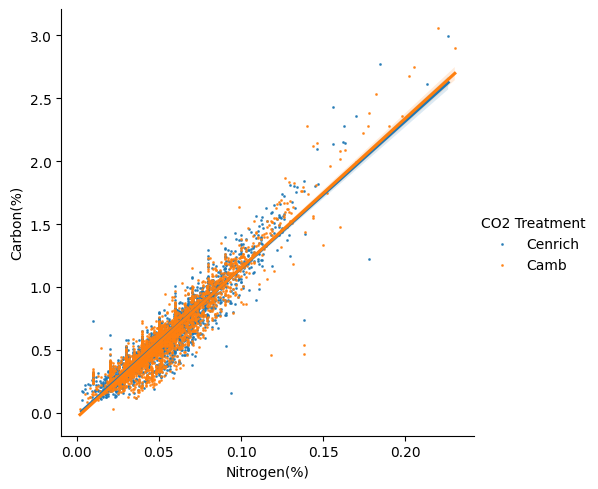

In [61]:
sns.lmplot(x = "Nitrogen(%)", y = "Carbon(%)", data = bicon, hue = "CO2 Treatment", scatter_kws={"s": 1})

# Data modeling and inferences

In [3]:
bicon

,Year,Plot,Ring,CO2 Treatment,Nitrogen Treatment,CountOfSpecies,CountOfGroup,Experiment,monospecies,Monogroup,Water Treatment,Temp Treatment,Depth,Carbon(%),Nitrogen(%),C/N Ratio
0,2002,1,1,Cenrich,Namb,4,2,M,,,,,0-10,0.618,0.074,8.351351351
1,2002,1,1,Cenrich,Namb,4,2,M,,,,,10-20,0.515,0.057,9.035087719
2,2002,1,1,Cenrich,Namb,4,2,M,,,,,20-40,0.142,0.023,6.173913043
3,2002,1,1,Cenrich,Namb,4,2,M,,,,,40-60,0.132,0.016,8.25
4,2002,2,1,Cenrich,Namb,1,1,M,Bouteloua gracilis,C-4,,,0-10,0.55,0.07,7.857142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5628,2016,365,6,Camb,Nenrich,4,2,M,,,,,40-60,0.329,0.027,12.18518519
5629,2016,366,6,Camb,Nenrich,1,1,M,Achillea millefolium,Forb,,,0-10,0.85,0.066,12.87878788
5630,2016,366,6,Camb,Nenrich,1,1,M,Achillea millefolium,Forb,,,10-20,0.57,0.05,11.4
5631,2016,366,6,Camb,Nenrich,1,1,M,Achillea millefolium,Forb,,,20-40,0.454,0.036,12.61111111
